In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

In [88]:
df=pd.read_csv(r"C:\Users\Masood\Downloads\Housing.csv")

In [90]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [92]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [94]:
#Feature Engineering

In [96]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [98]:
furnishing_status_dummies = pd.get_dummies(df['furnishingstatus'], prefix='furnishing', drop_first=True)
df = pd.concat([df, furnishing_status_dummies], axis=1)
df.drop('furnishingstatus', axis=1, inplace=True)

In [100]:
X = df.drop('price', axis=1)
y = df['price']

In [102]:
# 3. Data Scaling

In [104]:
scaler = MinMaxScaler()
cols_to_scale = X.columns
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=cols_to_scale)

In [106]:
# 4. Model Building

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=100)


In [110]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred = lr.predict(X_test)

In [114]:
# 5. Model Evaluation

In [116]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Model Performance Metrics ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

--- Model Performance Metrics ---
R-squared (R²): 0.6730
Mean Squared Error (MSE): 1283969782447.75
Root Mean Squared Error (RMSE): 1133123.90


In [118]:
# Visualize Actual vs. Predicted Prices

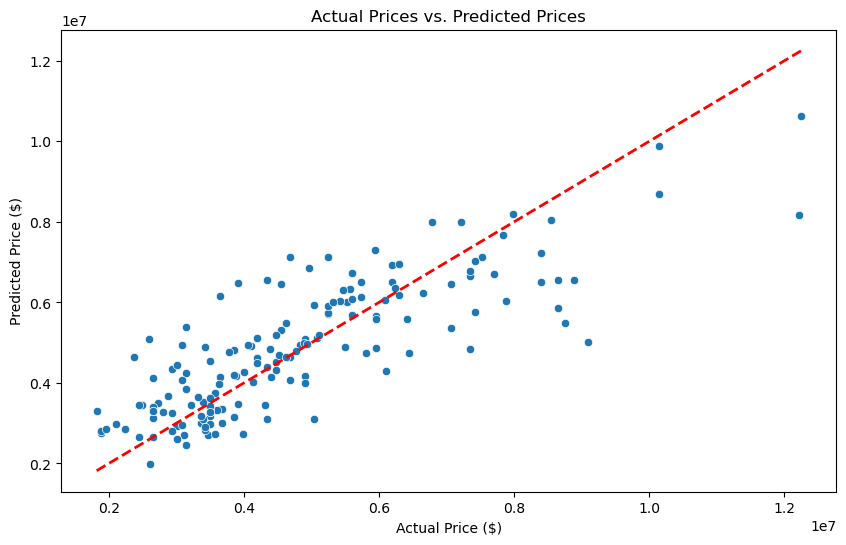

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.savefig('actual_vs_predicted.png')

In [122]:
# Visualize Residuals (Errors)

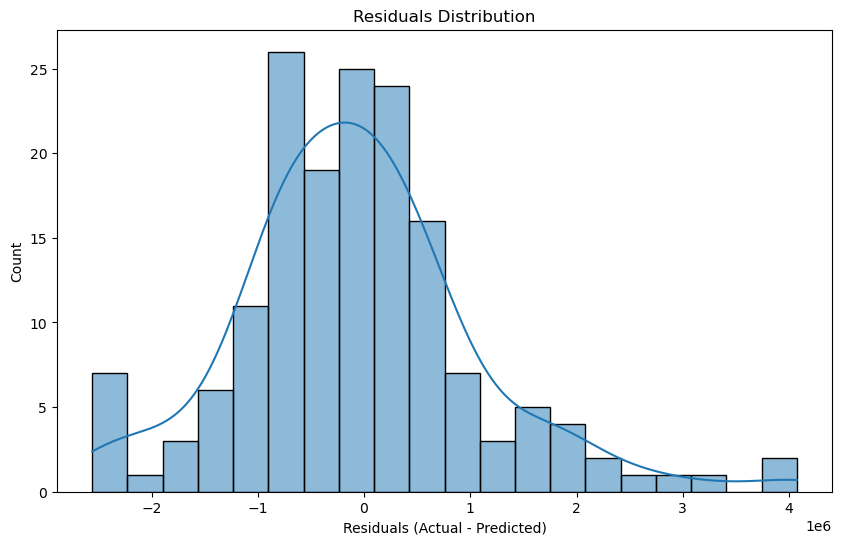

In [124]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.savefig('residuals_distribution.png')

In [126]:
coefficients = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficient'])
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False).drop('Absolute_Coefficient', axis=1)
print("\n--- Feature Importance (Coefficients) ---")
print(coefficients)


--- Feature Importance (Coefficients) ---
                            Coefficient
area                       3.470239e+06
bathrooms                  3.306012e+06
stories                    1.253356e+06
hotwaterheating            9.801708e+05
airconditioning            7.724748e+05
parking                    7.014931e+05
prefarea                   6.863920e+05
mainroad                   5.825986e+05
bedrooms                   5.397838e+05
furnishing_unfurnished    -3.581148e+05
guestroom                  3.514464e+05
basement                   2.494209e+05
furnishing_semi-furnished  1.063202e+04
